## Import and load data

In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc

ModuleNotFoundError: No module named 'sklearn'

In [3]:
students = pd.read_csv("/home/azat/Python_Lessons/files_lecture3/StudentsPerformance.csv")
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Score analysis

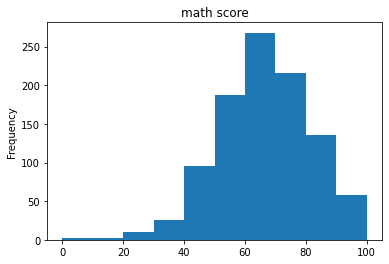

In [4]:
students["math score"].plot.hist(title="math score")

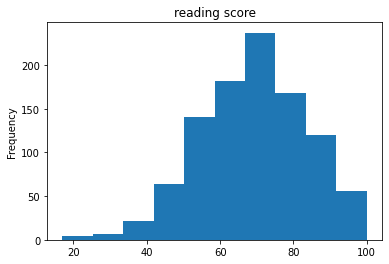

In [5]:
students["reading score"].plot.hist(title="reading score")

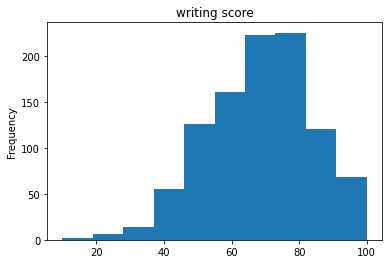

In [6]:
students["writing score"].plot.hist(title="writing score")

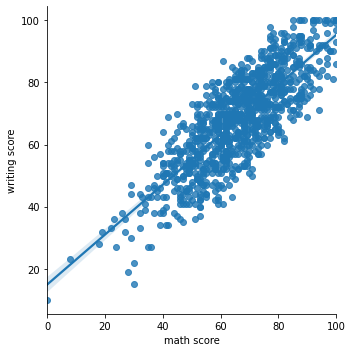

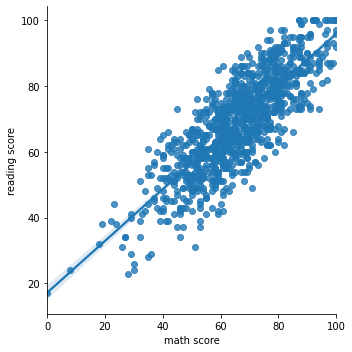

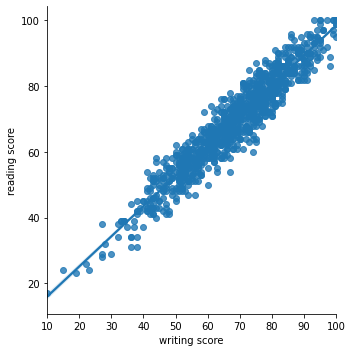

In [7]:
sns.lmplot(x='math score', y='writing score', data = students)
sns.lmplot(x='math score', y='reading score', data = students)
sns.lmplot(x='writing score', y='reading score', data = students)

## level of education & race ~ lunch

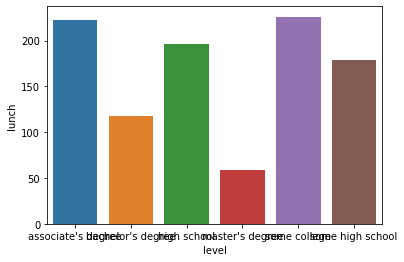

In [72]:
parental = students.groupby("parental level of education").aggregate({"lunch": "count"})

parental["level"] = ["associate's degree", "bachelor's degree", "high school",
                     "master's degree", "some college", "some high school"]

stats = sc.stats.chisquare(parental["lunch"])
sns.barplot(x="level", y = "lunch", data = parental)
# Make chi-square test to find out dependency between parental level of education and lunch
# Use test results we can conclude that variables have significant dependency

In [73]:
stats

Power_divergenceResult(statistic=129.332, pvalue=3.298566601229954e-26)

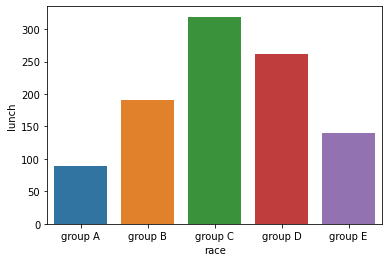

In [80]:
race = students.groupby("race/ethnicity").aggregate({"lunch": "count"})
race["race"] = ["group " + i for i in "ABCDE"]
stats2 = sc.stats.chisquare(parental["lunch"])
sns.barplot(x="race", y = "lunch", data = race)
# Make chi-square test to find out dependency between race of students and lunch
# Use test results we can conclude that variables have significant dependency

In [81]:
stats2

Power_divergenceResult(statistic=129.332, pvalue=3.298566601229954e-26)